# CS640 Project Report

This is a template for your competition report. Complete the secitons below and submit a PDF file to Gradescope. One submission per group will suffice.

## Instructions

### General Instructions
In an ipython notebook, to run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]`(like "play") button above. To edit any code or text cell (double) click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Most of the written questions are followed by a cell for you enter your answers. If not, please insert one. Your answers and the questions should **not** be in the same cell.

### Instructions on Math
Some questions require you to enter math expressions. To enter your solutions, put down your derivations into the corresponding cells below using LaTeX. Show all steps when proving statements. If you are not familiar with LaTeX, you should look at some tutorials and at the examples listed below between \$..\$.

Alternatively, you can scan your work from paper and insert the image(s) in a text cell.

## Submission
Once you are ready, save the notebook as PDF file (File -> Print -> Save as PDF) and submit to Gradescope. Make sure all outputs are visible.


## Section 0: Basic Information
Please input your members' names in the next block.

**Answer**

## Section 1: Data Analysis

All research experiments start from basic level of data analysis. In this section, describe what you learn from the training data. Your answer may inlcude: what are the labels and their distribution, what do the data look like, and whatever observation that is interesting. Creating figures to help illustration is strongly recommended.

Feel free to create text and code cells below.

   image_id label
0     57598    CC
1     30868    MC
2     42549    CC
3     64824    CC
4     15293  HGSC
Label Distribution:
HGSC    177
EC       99
CC       79
LGSC     38
MC       37
Name: label, dtype: int64


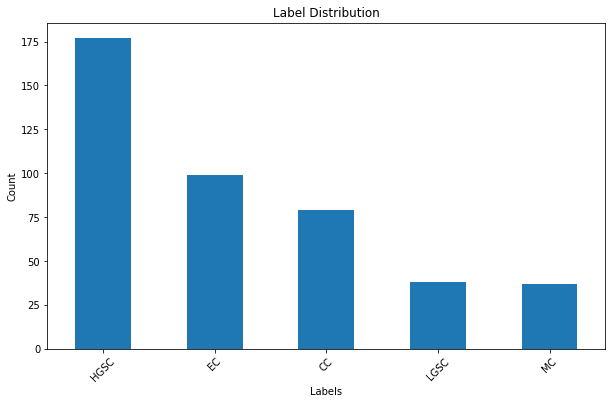

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = 'train.csv'
labels_df = pd.read_csv(csv_path)

print(labels_df.head())

label_distribution = labels_df['label'].value_counts()

print("Label Distribution:")
print(label_distribution)

label_distribution.plot(kind='bar', rot=45, figsize=(10, 6))
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()


In [3]:
from PIL import Image
import os

image_folder="train_images_compressed_80 "
Image.MAX_IMAGE_PIXELS = None

labels_df['Image_Size'] = labels_df['image_id'].apply(lambda x: Image.open(os.path.join(image_folder, str(x) + ".jpg"))).size
labels_df['Image_Size']


0      430
1      430
2      430
3      430
4      430
      ... 
425    430
426    430
427    430
428    430
429    430
Name: Image_Size, Length: 430, dtype: int64

## Section 2: Methods

You are asked to experiment with different approaches which includes preprocessing and classifying. In this section, describe these approaches. In particular, for each of them,

1. if you design the approach from scratch, explain in detail, and discuss the source that inspires you if there is any;
2. if you build the approach based on a pre-trained model (e.g., ResNet) or a posted solution on Kaggle, cite the source (the paper and the link), summarize the original model in your own words, and describe what modification you make if there is any.

Write your answer in the following blocks. You can add more if you like.

### Approach 1

#### Network Introduction

I used the ResNet-152 network as the underlying network. ResNet-152 is a deep convolutional neural network architecture that belongs to the family of Residual Networks (ResNets). ResNets were introduced to address the problem of vanishing gradients in very deep neural networks by utilizing residual learning. ResNet-152 is an extended version of the original ResNet, designed for even deeper architectures.

Here are the key features and details of ResNet-152:

Architecture:

ResNet-152 consists of 152 layers, making it a very deep neural network. The depth is achieved through the use of residual blocks, where shortcuts, or skip connections, are introduced to allow the gradient to flow more easily during training.
Residual Blocks:

The basic building block of ResNet-152 is the residual block. Each block consists of two convolutional layers with batch normalization and Rectified Linear Unit (ReLU) activations. The input to the block is added to the output via a shortcut connection. This helps in preventing the vanishing gradient problem and enables training of very deep networks.
Bottleneck Design:

ResNet-152 uses a bottleneck design in its residual blocks to reduce computational complexity. The bottleneck architecture involves using 1x1, 3x3, and 1x1 convolutions in succession. This design helps in reducing the number of parameters and computations in the intermediate layers.
Global Average Pooling (GAP):

Instead of using fully connected layers at the end of the network, ResNet-152 employs global average pooling. This pooling operation computes the average value of each feature map, reducing spatial dimensions to a single value per feature. This contributes to a more compact and interpretable representation.
Pre-trained Models:

ResNet-152 is often pre-trained on large datasets like ImageNet, which enables transfer learning for various computer vision tasks. Transfer learning involves using a pre-trained model as a starting point for a new task, allowing the model to leverage knowledge learned from the original dataset.
Applications:

Due to its deep architecture and strong performance on image classification tasks, ResNet-152 has been widely used in various computer vision applications, including object detection, image segmentation, and feature extraction.
Implementation:

ResNet-152 can be implemented using deep learning frameworks such as TensorFlow or PyTorch. Many pre-trained models and implementations are available, allowing researchers and practitioners to use and fine-tune the network for specific tasks.
In summary, ResNet-152 is a powerful deep neural network architecture designed to overcome challenges associated with training very deep networks. Its residual learning approach and bottleneck design have contributed to its success in various computer vision tasks.

#### Improvement

Resnet-152 originally had the last layer as a fully connected layer with an output unit of 2. The UBC_OCEAN dataset has a total of 5 labels, so in order to adapt to the UBC_OCEAN classification task, the last layer was changed to a fully connected layer with an output unit of 5.

Once the network structure has been determined, the dataset needs to be preprocessed first, and the preprocessing I performed on the dataset is as follows:
1. transforms.Resize(256): Resize the image to have a height and width of 256 pixels with anti-aliasing.
2. transforms.CenterCrop(224): Perform a center crop to obtain a region of interest of size 224x224 pixels.
3. transforms.ToPILImage(): Convert the cropped tensor back to a PIL Image.
4. transforms.ToTensor(): Convert the PIL Image to a PyTorch tensor.
5. transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]): Normalize the tensor by subtracting the mean and dividing by the standard deviation, which is a common practice for pre-processing images before feeding them into pre-trained neural networks.

The purpose of these transformations is to prepare the input image for a neural network, typically one pre-trained on ImageNet, by resizing, cropping, and normalizing it according to the expected input format of the model.

Additionally I used SGD to compute the gradient and CrossEntropyLoss to compute the loss value, setting the learning_rate to 0.001.

In terms of the dataset, I set the epoch to 10, after testing, the most suitable when num_work is 8, the A100 server I used for training can reach the fastest training speed, so set num_worker=8, for the batchsize size, I tried 64, 32, 16, 8, and finally tested to get the highest accuracy of the training set when the batchsize is 16.

### Approach 2

I used the ResNet-101 network as the base network, ResNet-101 and ResNet-152 are mainly just different in the number of network layers, the idea is the same as ResNet-152, so I will not repeat it.

In the improvement of the network, I used the same method as APPROACH 1, but got better results than ResNet-152.

### Approach 3

I used the ResNet-50 network as the base network, the main difference between ResNet-50 and ResNet-152 and ResNet-101 is the number of network layers, but its all from the ResNet family, the idea is the same, so I won't go into it again.

In the improvement of the network, I used the same method as APPROACH 1, but the results obtained are better than ResNet-152 and similar to ResNet-101.

## Section 3: Experiments and Results

Describe the experiments you have conducted and the corresponding performance results (in terms of confusion matrix, accuracy, F1, etc.).

When showing the performance results, organze them in a clean way. For example, you can show the results one approach at a time and keep the outputs in a consistent format across the approaches. Do **not** simply list numbers or figures.

**Answer**

During training I used tensorboard to record the loss and training set accuracy of each model during training, I trained a total of 6 models, 4 ResNet-152 models, one ResNet-101 model and one ResNet-50 model. In the 4 ResNet-152 models, the batch sizes are 64, 32, 16 and 8 respectively, and the final test found that the training accuracy is highest when the batch size is 16, because this project is mainly to compare the performance of 3 ResNet networks with different layers, so we don't show the data of ResNet networks with different batch sizes specifically. Both ResNet-101 and ResNet-50 models use batchsize=16, and the training results of the three different models of ResNet are shown next.

#### ResNet-152

During the training process, the loss obtained from the forward pass after each input of the training image is shown below:

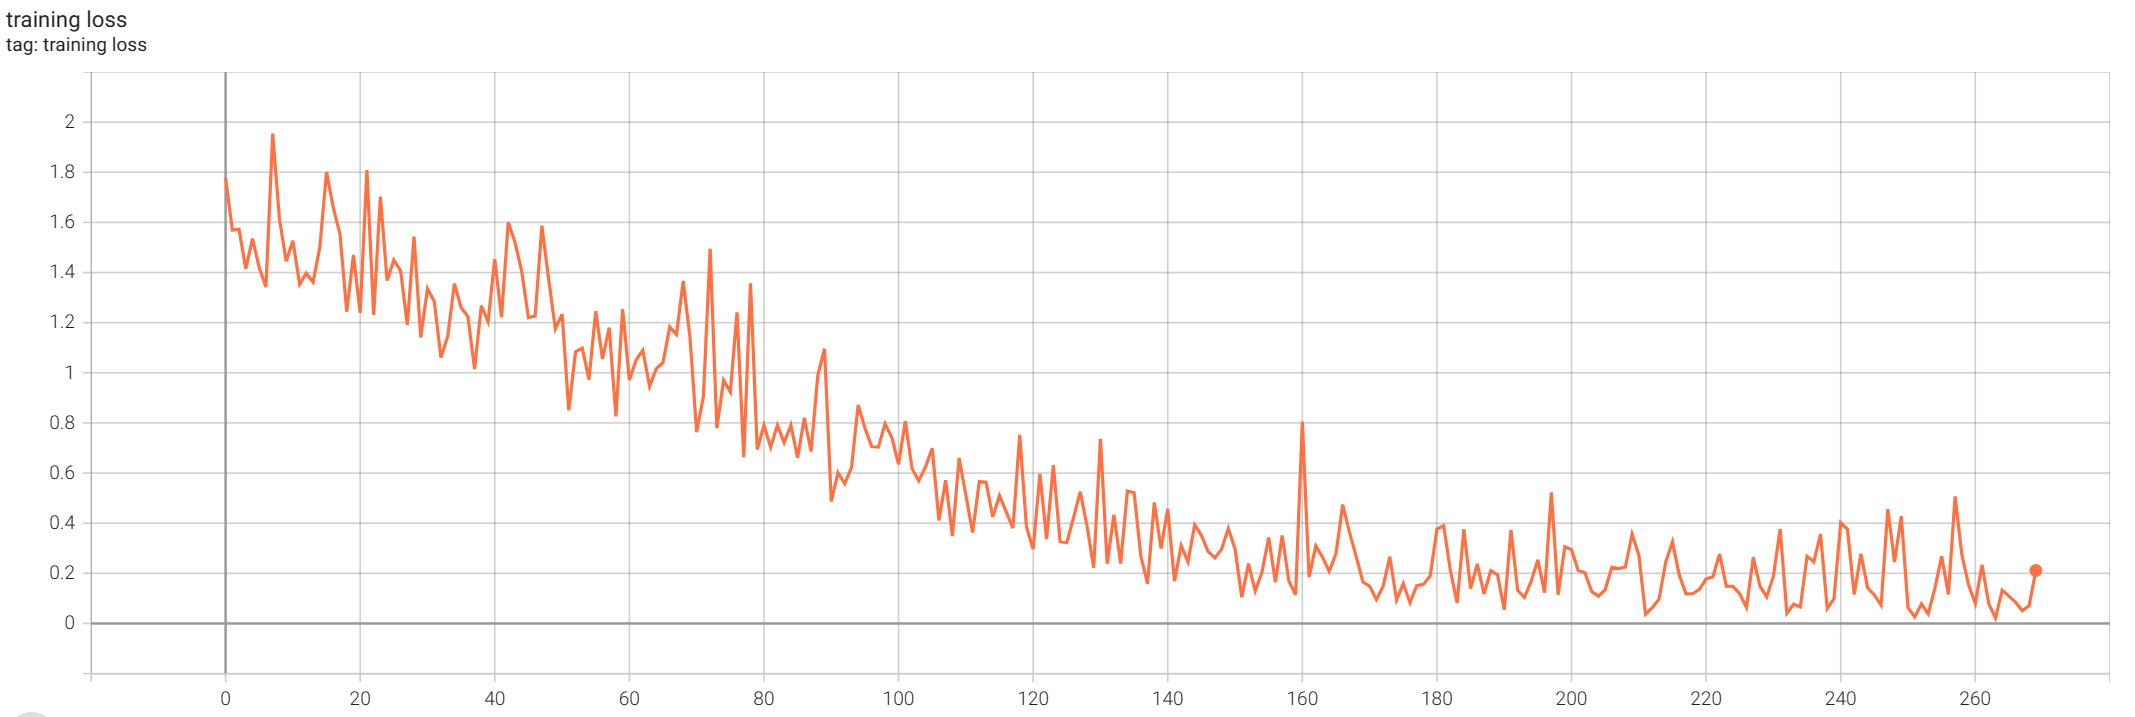

As you can see from the graph above, the loss tends to get progressively smaller and eventually oscillates around a certain value.

There are 10 epochs in total and the average loss for each epoch is shown below:

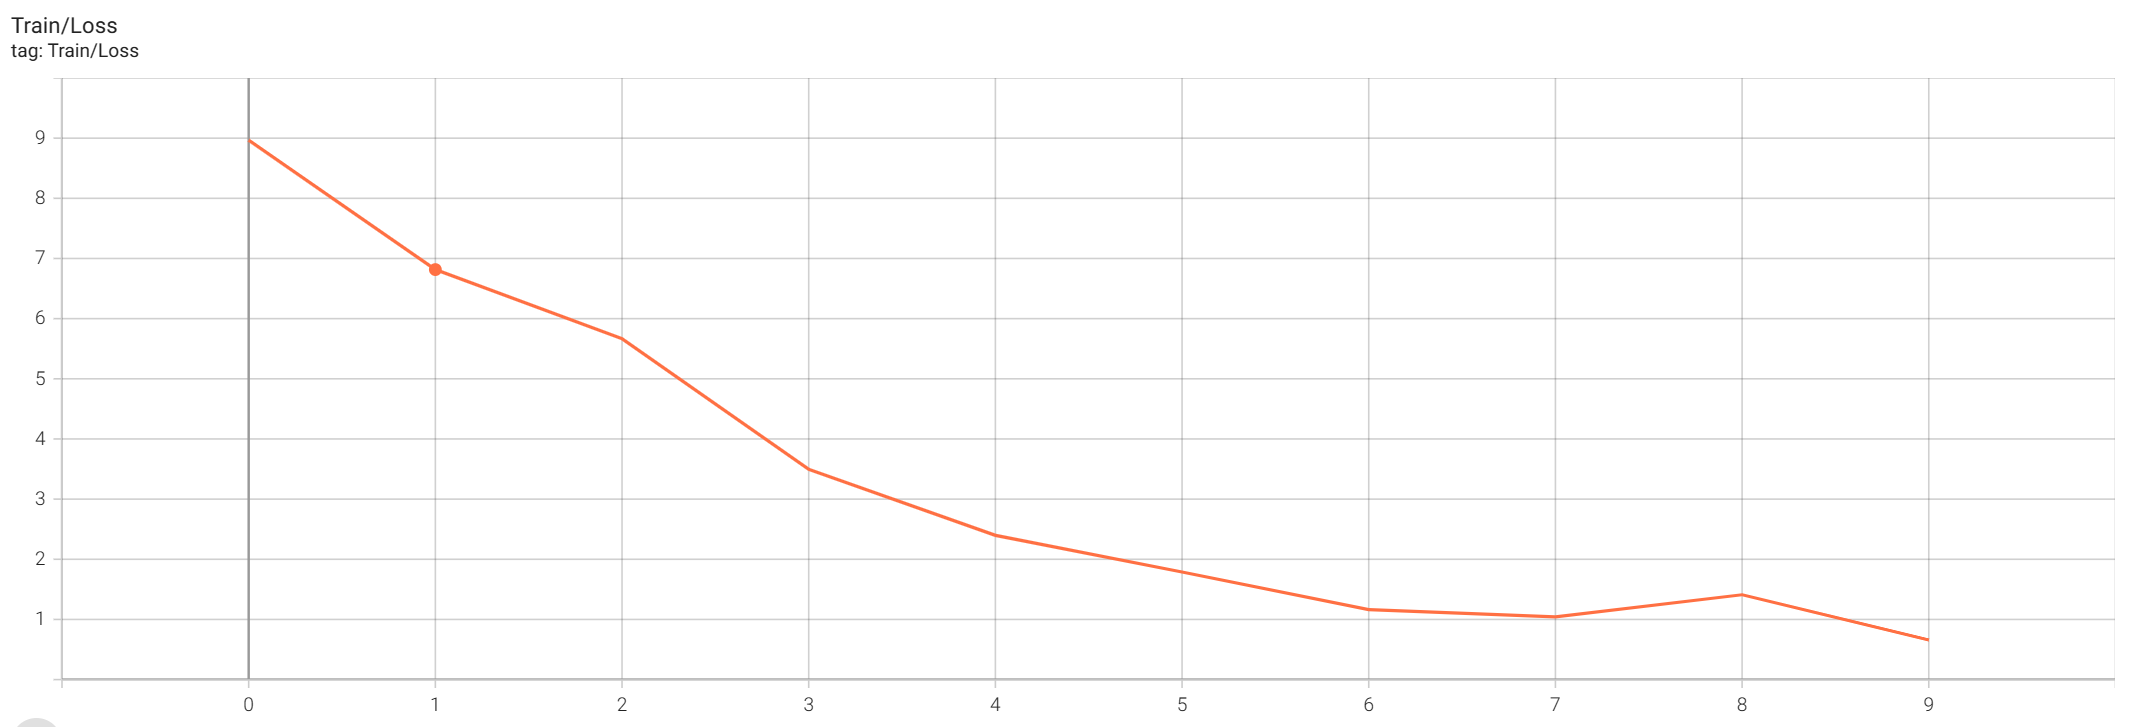

As can be seen from the above figure, overall, as the epoch increases, the loss is gradually becoming smaller, and the loss decreases quickly at the beginning and slowly later, indicating that the training makes the model and the dataset more and more fit.

For each epoch, the accuracy of its training is calculated and the results are shown below:

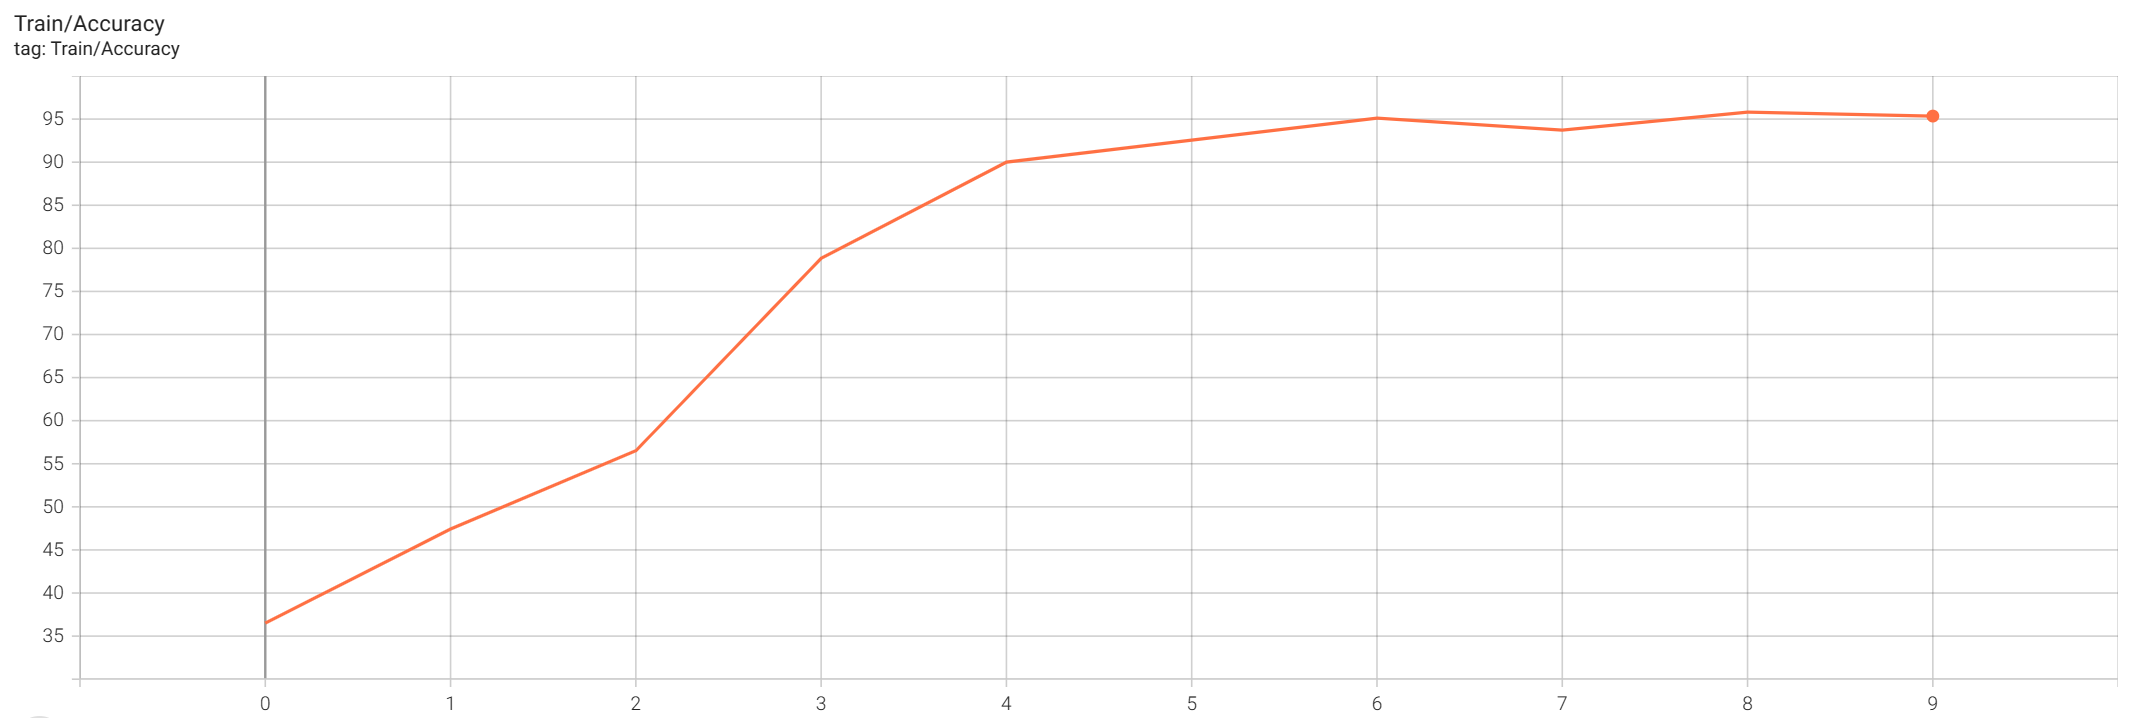

From the above figure, it can be seen that with the increase of epoch, the performance of the model is gradually getting better, at first the model performance increases very quickly, and then gradually reduces the growth rate and stabilizes around a certain value. During the training process, the maximum value of the training set accuracy is 95.81%

#### ResNet-101

During the training process, the loss obtained from the forward pass after each input of the training image is shown below:

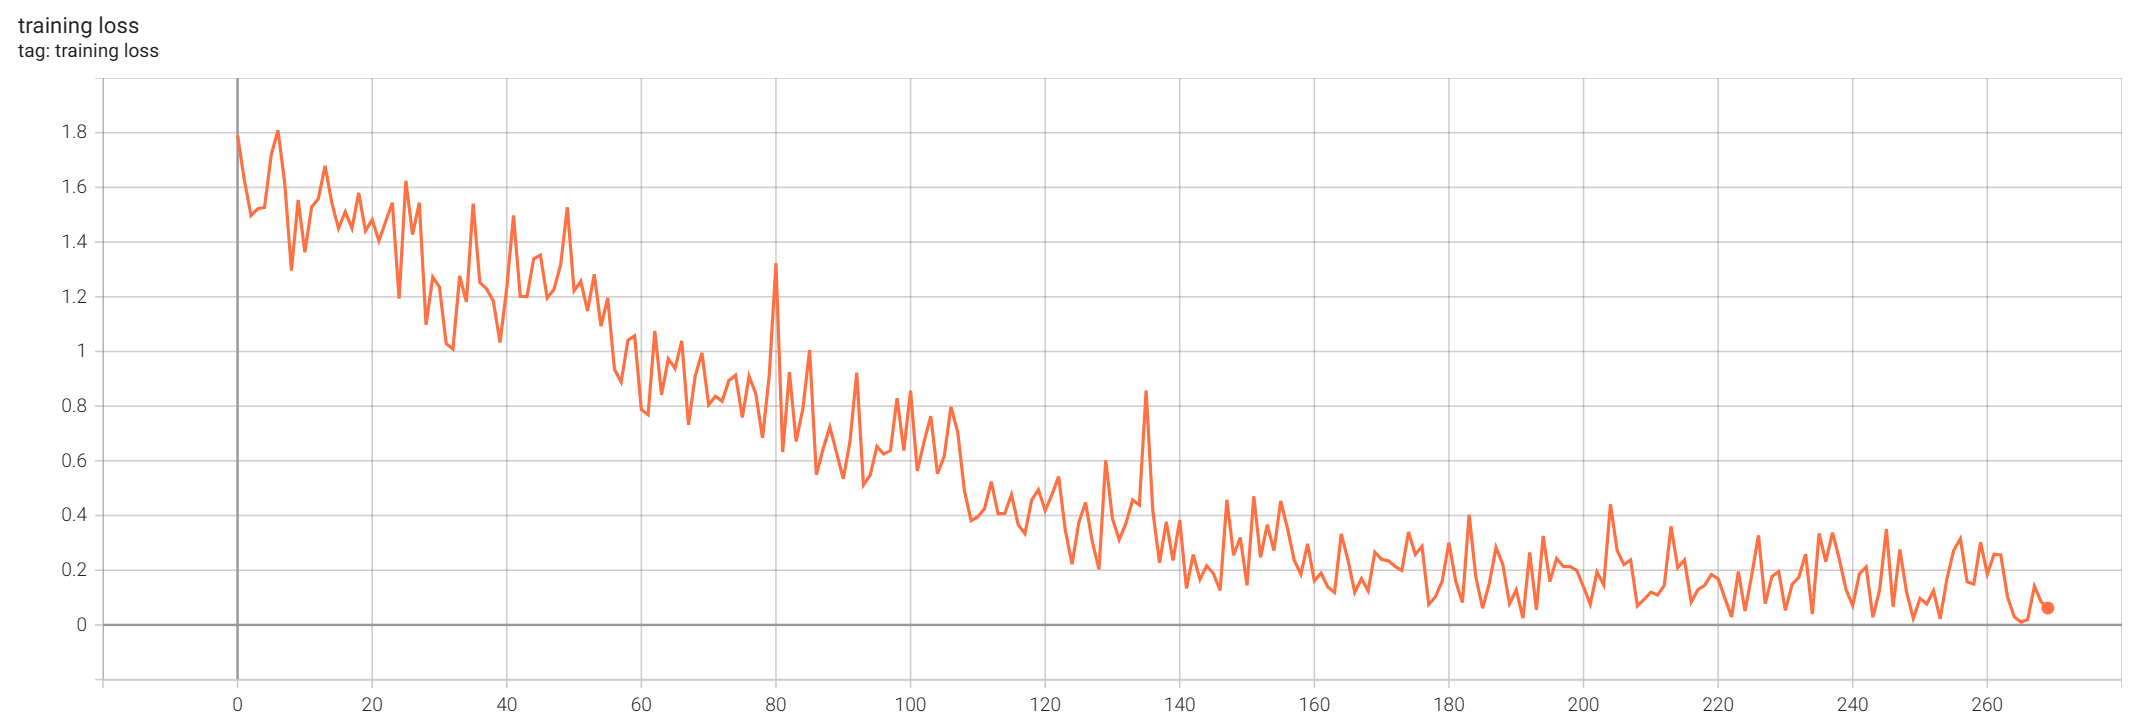

As can be seen from the above graph, the loss tends to get progressively smaller and eventually oscillates around a certain value.

There are 10 epochs in total and the average loss for each epoch is shown below:

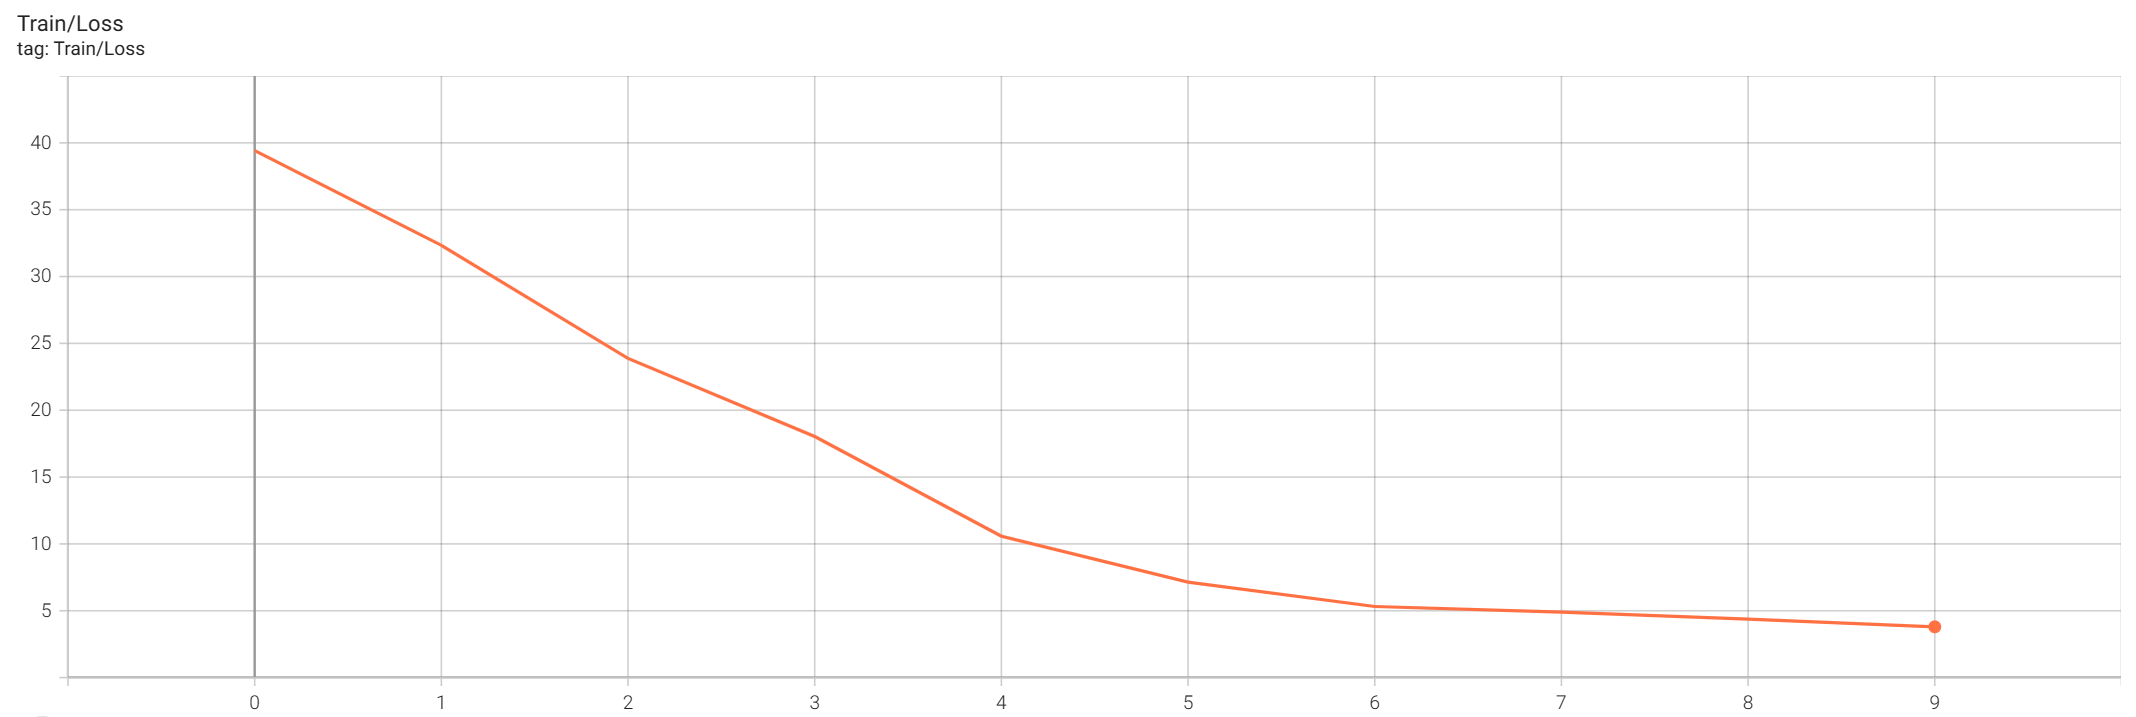

As can be seen from the above figure, overall, as the epoch increases, the loss is gradually becoming smaller, and the loss decreases quickly at the beginning and slowly later, indicating that the training makes the model and the dataset more and more fit.

For each epoch, the accuracy of its training is calculated and the results are shown below:

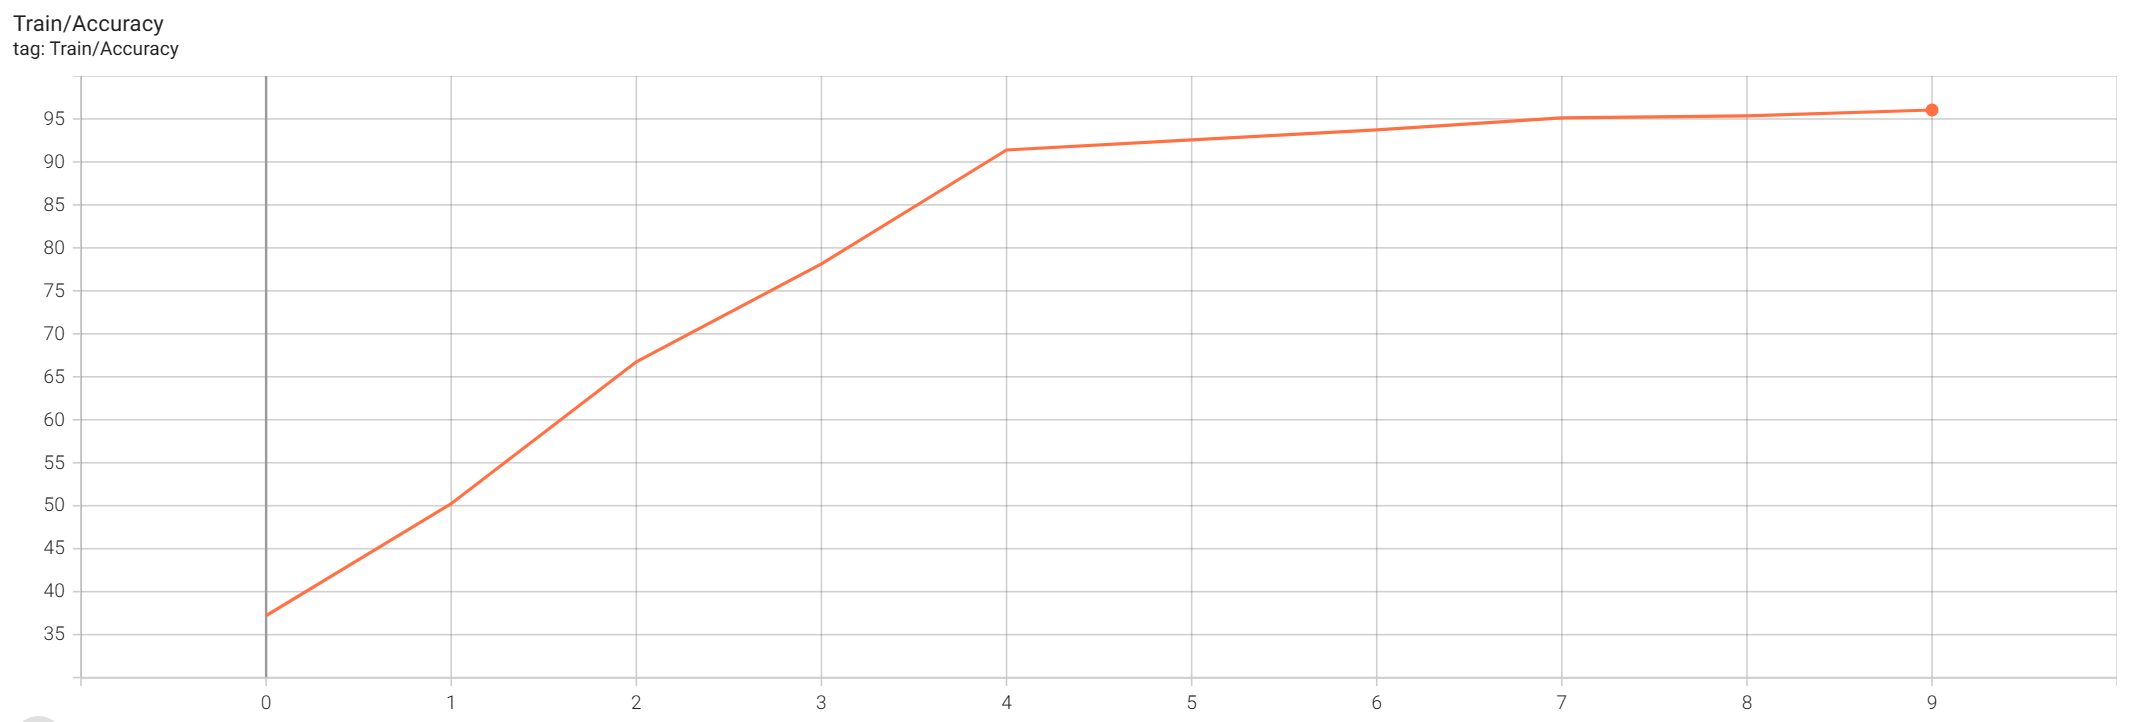

From the above figure, it can be seen that with the increase of epoch, the performance of the model is gradually getting better, at first the model performance increases very quickly, and then gradually reduces the growth rate and stabilizes around a certain value. During the training process, the maximum training set accuracy is 96.05%

#### ResNet-50

During the training process, the loss obtained from the forward pass after each input of the training image is shown below:

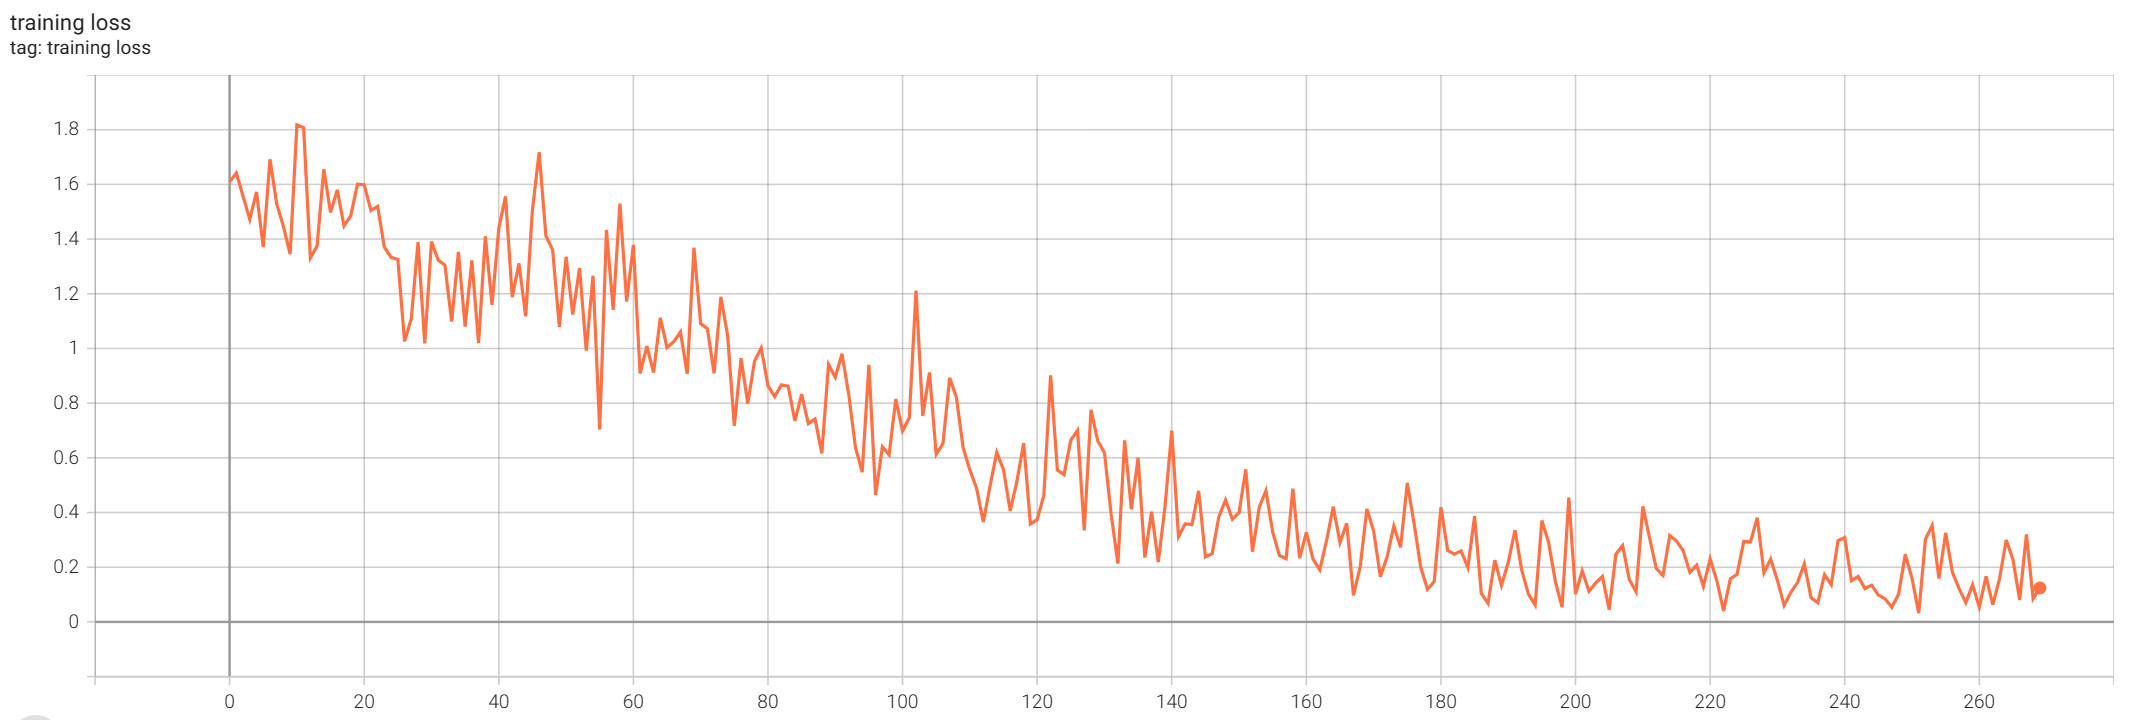

As you can see from the graph above, the loss tends to get progressively smaller and eventually oscillates around a certain value.

There are 10 epochs in total and the average loss for each epoch is shown below:

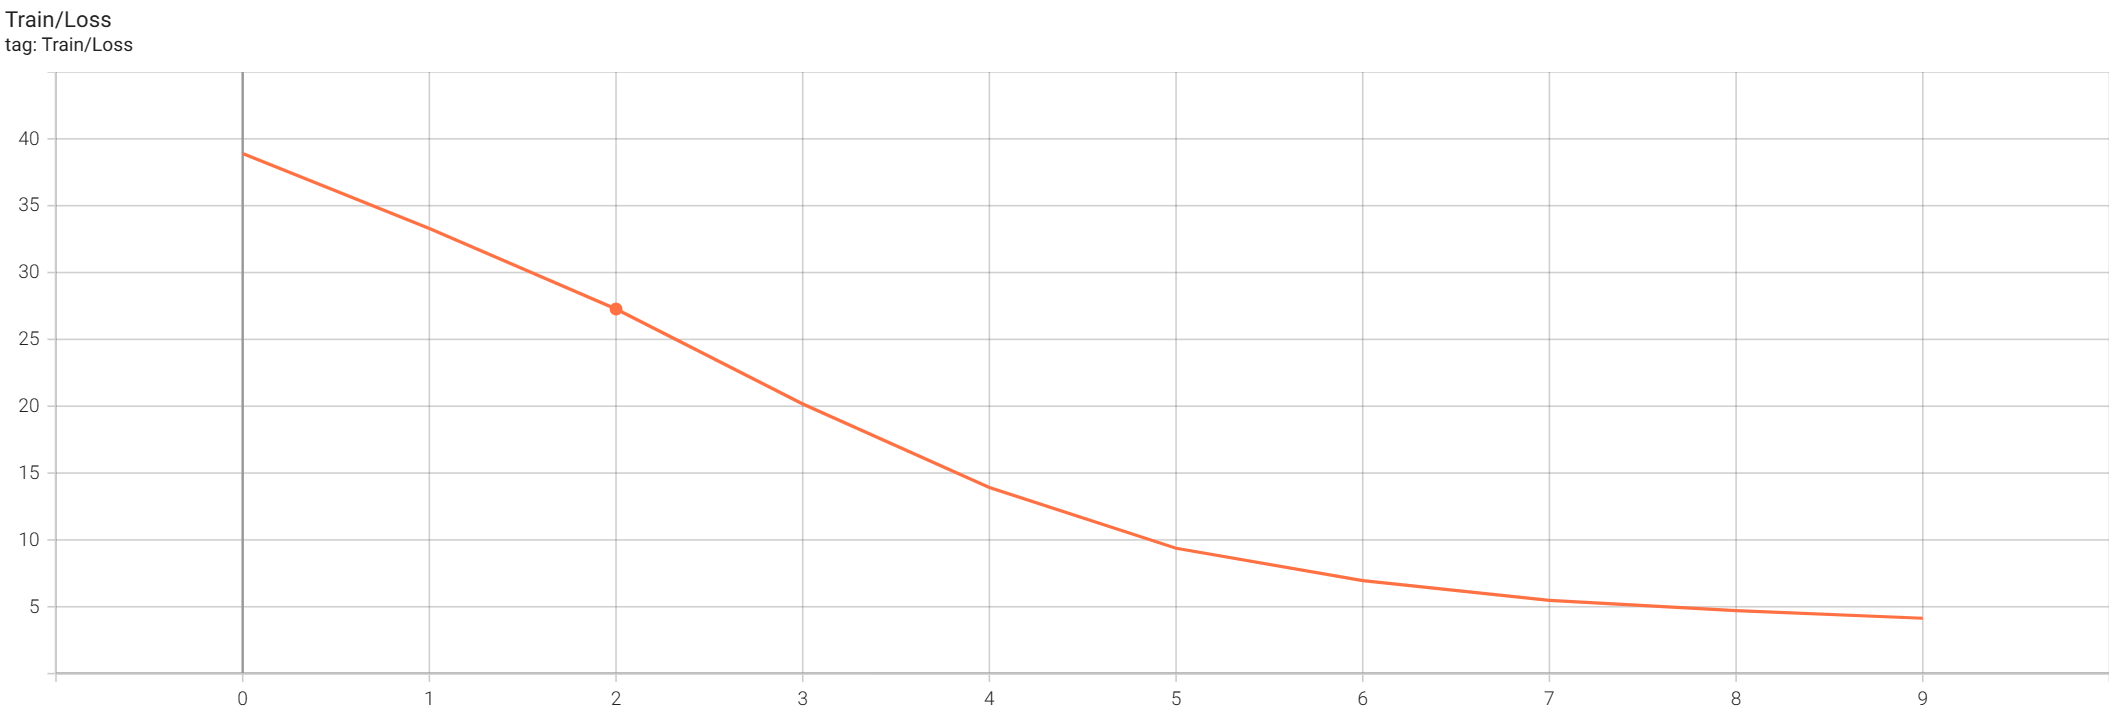

As can be seen from the above figure, overall, as the epoch increases, the loss is gradually becoming smaller, and the loss decreases quickly at the beginning and slowly later, indicating that the training makes the model and the dataset more and more fit.

For each epoch, the accuracy of its training is calculated and the results are shown below:

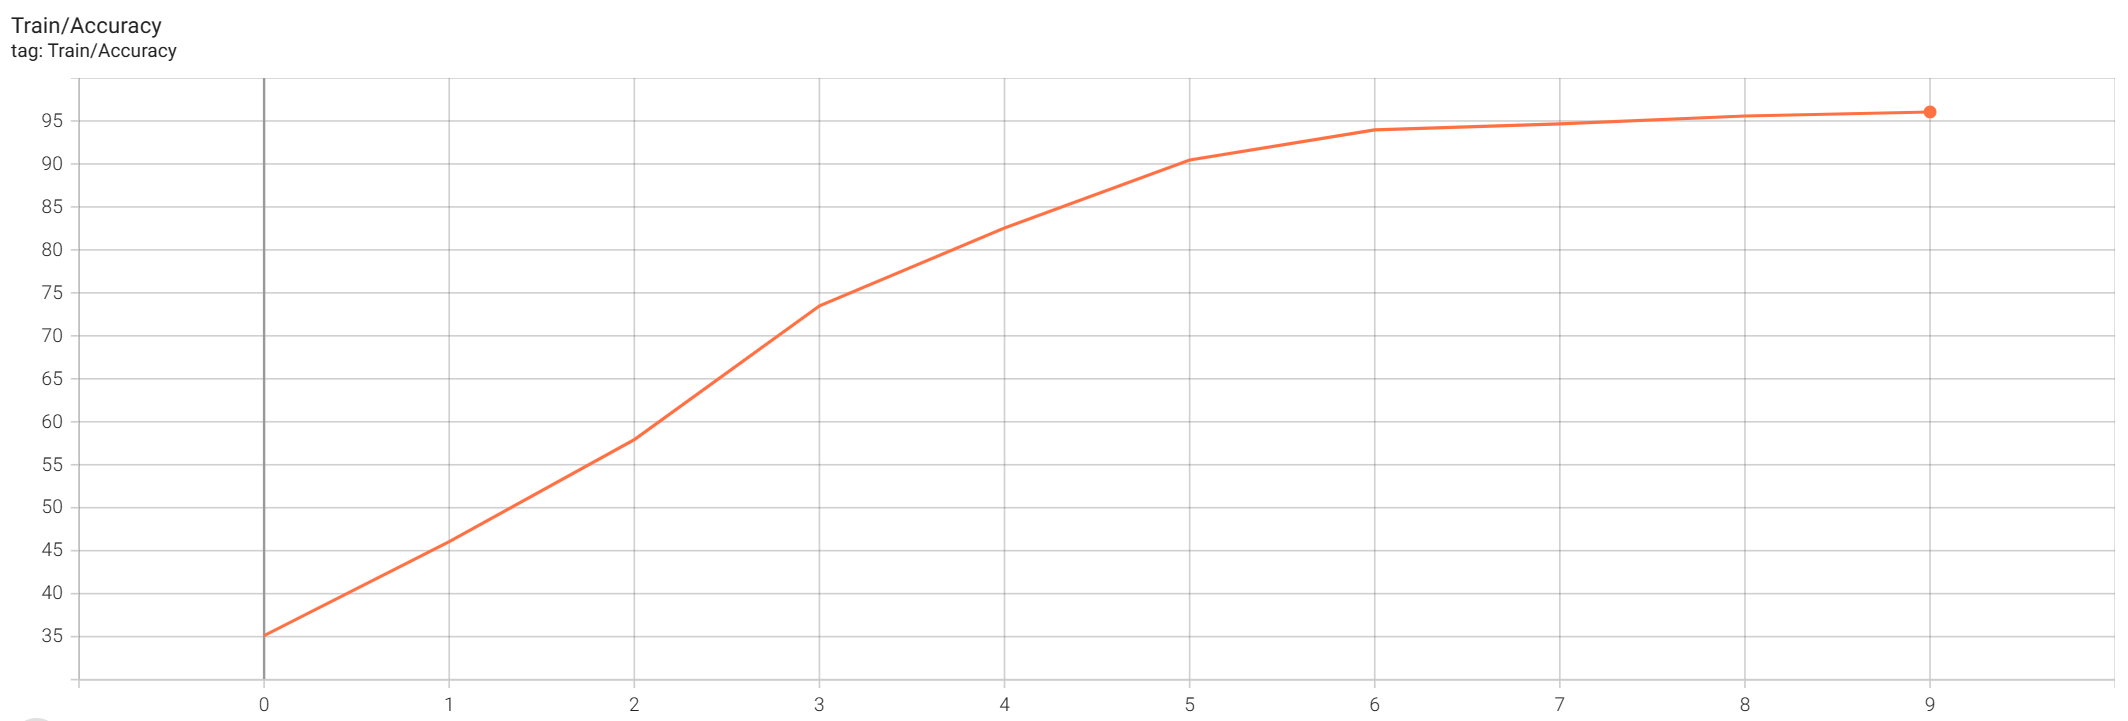

From the above figure, it can be seen that with the increase of epoch, the performance of the model is gradually getting better, at first the model performance increases very quickly, and then gradually reduces the growth rate and stabilizes around a certain value. During the training process, the maximum training set accuracy is 96.05%


## Section 4: Discussions

Discuss the results in words. For example, you can compare the results, show some interesting discovery, propose insights, etc.. Using a combination of figures and words is recommended.

**Answer**

In this task, the most suitable batchsize for the ResNet network is 16, when the training set has the highest accuracy.

The accuracy of the three models is shown in the table below:

| Model | Accuracy|
|--------|---------|
|ResNet-152|95.81%|
|ResNet-101|96.05%|
|ResNet-50|96.05%|

The training set accuracy of ResNet-101 and ResNet-50 are the same and both are higher than that of ResNet-152. However, in terms of loss, in the last epoch, the loss of ResNet-101 is smaller than that of ResNet-50. Thus in a combined comparison, ResNet-101 has the best performance among these three models.


## Section 4: Conclusion

Point out your chosen approach for the evaluation on the test data. Also show the hyper-parameter values. You can answer with a code cell.

**Answer**

In [22]:
from torch.utils.tensorboard.summary import image
import torchvision.transforms as transforms
from torchvision.io import read_image
import os
import pandas
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score

all_labels = np.load("all_labels.npy").tolist()
df_test = pandas.read_csv("predict_test.csv")
image_paths = "./test_images_compressed_80/"
X = []
Y_pred = [all_labels.index(label) for label in df_test["label"]]
myTransforms = transforms.Compose([transforms.Resize(256),
                              transforms.CenterCrop(224),
                              transforms.ToPILImage(),
                              transforms.ToTensor(),
                              transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])

for i in range(108):
    image = read_image(os.path.join(image_paths, str(i) + ".jpg"))
    image = myTransforms(image)
    X.append(np.array(image).reshape(-1))

kmeans = KMeans(n_clusters=len(all_labels), random_state=0)
kmeans.fit(np.array(X))
labels = kmeans.labels_

amis = adjusted_mutual_info_score(Y_pred, labels)
print(f"Adjusted Rand Index: {amis:.4f}")

Adjusted Rand Index: 0.0382
